In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from pyresample import kd_tree, geometry 

In [2]:
grd_file = r'/Users/gonzalgo/Downloads/greenl_00605_17028_004_170311_ALTTBB_HH_04.hgt.grd'

In [3]:
data = np.fromfile(grd_file, dtype = '<f4')

In [26]:
lat_lines = 28685
lon_lines = 8409

In [6]:
data = np.reshape(data, (lat_lines, lon_lines))

In [7]:
data.min()

-10000.0

In [8]:
data.max()

2057.5615

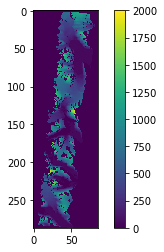

In [9]:
plt.imshow(data[::100, ::100], vmin=0, vmax=2000);plt.colorbar()

In [10]:
data_nan = np.where(data > -10000, data, np.nan)

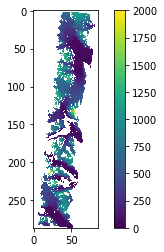

In [11]:
plt.imshow(data_nan[::100, ::100], vmin=0, vmax=2000);plt.colorbar()

In [12]:
lat_start = 63.943638888888898
lon_start = -41.986611111111117
lat_space = -2.777777777777778E-05
lon_space = 5.555555555555556E-05

lats = np.linspace(lat_start - 0.5 * lat_space, (lat_start - 0.5 * lat_space) + (lat_space * (lat_lines + 1)), lat_lines + 1)
lons = np.linspace(lon_start - 0.5 * lon_space, (lon_start - 0.5 * lon_space) + (lon_space * (lon_lines + 1)), lon_lines + 1)

In [13]:
lats.shape

(28686,)

In [14]:
lons.shape

(8410,)

In [15]:
data_nan.shape

(28685, 8409)

CPU times: user 184 ms, sys: 27.4 ms, total: 211 ms
Wall time: 216 ms


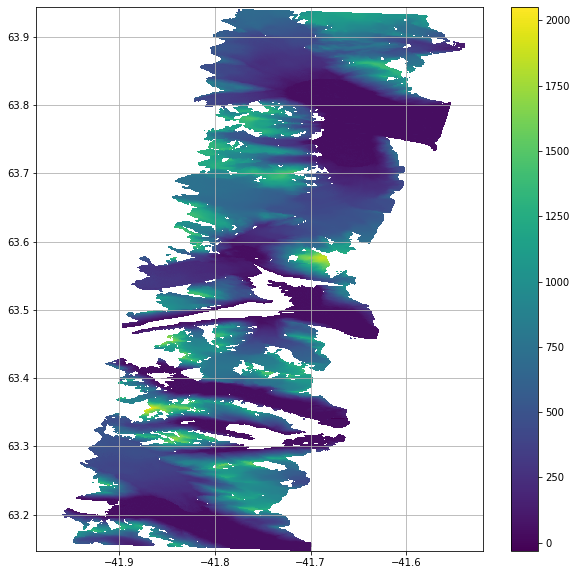

In [16]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons[::10], lats[::10], data_nan[::10, ::10]);plt.grid();plt.colorbar()

In [17]:
upper_right_lat = 63.930550738
upper_right_lon = -41.519516372
lower_left_lat = 63.159604107
lower_left_lon = -41.986574677


area_id = 'WGS84'
description = 'lat-lon'
proj_id = 'greenl_00605_170311'
proj_string = 'EPSG:4326'
width = 841
height = 2869
area_extent = (lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)
area_original = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [18]:
area_original.shape

(2869, 841)

In [19]:
area_id = 'WGS84'
description = 'UTM 24n'
proj_id = 'greenl_00605_170311_new'
proj_string = 'EPSG:32624'
width = 2800
height = 800
area_extent = (350000, 7000000, 378000, 7100000)
area_new = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [20]:
data_nan_subset = data_nan[::10, ::10]

In [21]:
data_nan_subset.shape

(2869, 841)

In [22]:
%time result = kd_tree.resample_nearest(area_original, data_nan_subset, area_new, radius_of_influence=800, fill_value=np.nan)

CPU times: user 2 s, sys: 173 ms, total: 2.17 s
Wall time: 2.22 s


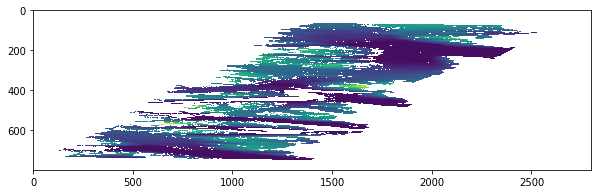

In [23]:
plt.figure(figsize=(10,10));plt.imshow(result)

In [24]:
xe = np.linspace(350000, 378000, 2800)
ye = np.linspace(7100000, 7000000, 800)
xx, yy = np.meshgrid(xe, ye)

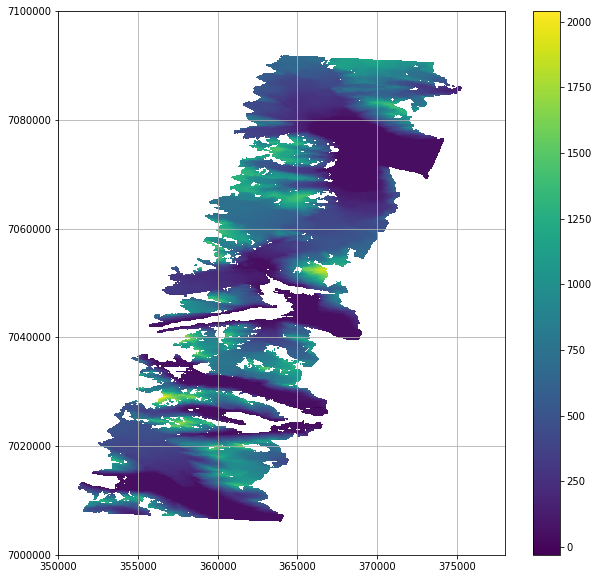

In [25]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result);plt.colorbar();plt.grid();